In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go
# import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt

In [27]:
!pip uninstall opencv-python -y?
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall


Object `y` not found.
     |████████████████████████████████| 30.6MB 129kB/s 
     |████████████████████████████████| 20.2MB 1.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box_in_scene.png',cv2.IMREAD_GRAYSCALE)

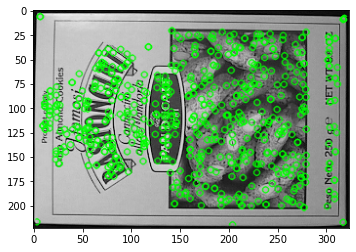

In [4]:
# cv2_imshow(image2)
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)

plt.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))

Text(0.5, 0, '(b)')

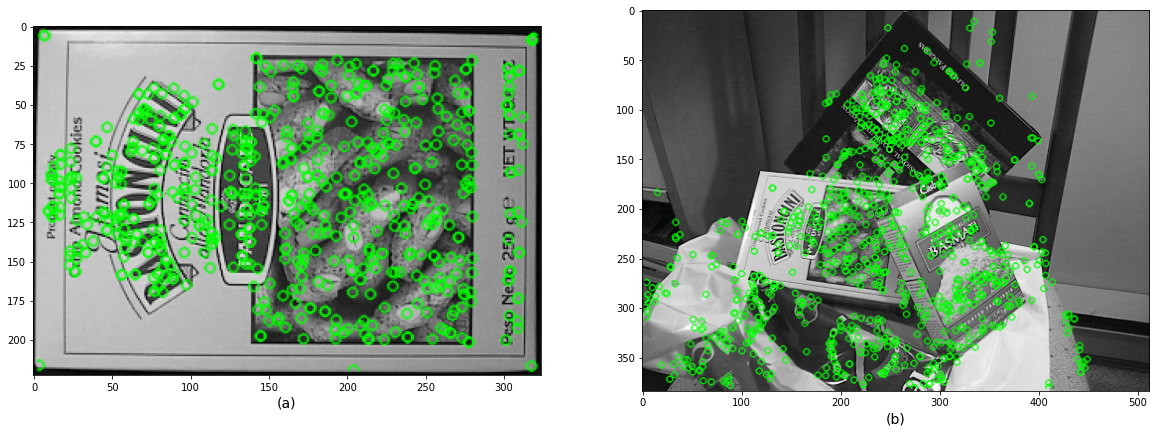

In [5]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

### Take an image and a pixel location (15,15). Take the window size of 3,3 such that the pixel is located at the center of the window size. Now form a vector of 9 values which are just the intensities in that window.


In [6]:
image2=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box.png',cv2.IMREAD_GRAYSCALE)
# vec=np.zeros((9), dtype=int)
vec=[]
for i in range(14, 17):
  for j in range(14, 17):
    vec.append(image2[i][j])
vec=np.array(vec)
vec
# plt.imshow(image2[14:17,14:17],cmap='gray')

array([196, 195, 198, 196, 196, 199, 197, 196, 198], dtype=uint8)

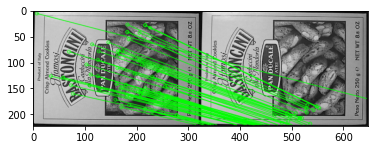

In [7]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(img3)

In [0]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg1/img2_2.png')
image2=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg1/img2_1.png')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [0]:
# find the keypoints and descriptors with ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1_gray,None)
kp2, des2 = sift.detectAndCompute(image2_gray,None)

Text(0.5, 0, '(b)')

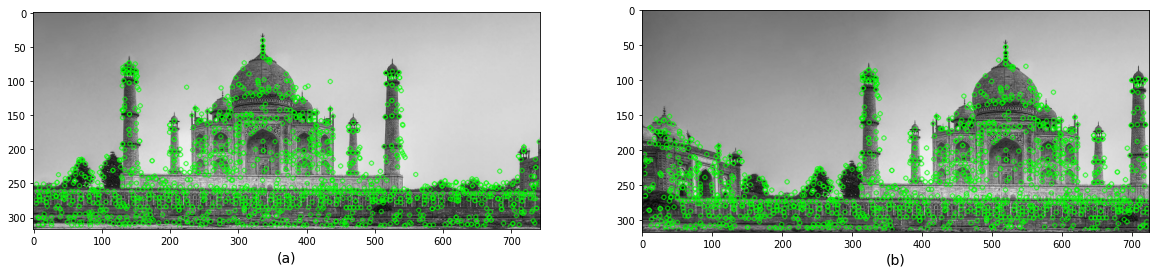

In [11]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

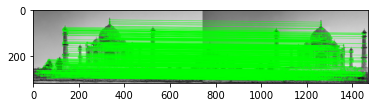

In [12]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
plt.imshow(img3)

In [0]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #plt.imshow(img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

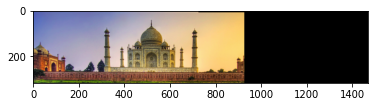

In [14]:
dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]))
dst[0:image2.shape[0],0:image2.shape[1]] = image2
plt.imshow(dst)

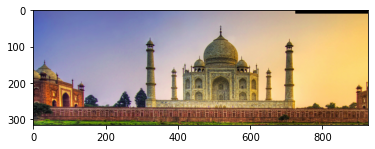

In [15]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop right
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame

plt.imshow(trim(dst))
#cv2.imsave("original_image_stitched_crop.jpg", trim(dst))

In [0]:
def trim(frame):
          #crop top
          if not np.sum(frame[0]):
              return trim(frame[1:])
          #crop bottom
          if not np.sum(frame[-1]):
              return trim(frame[:-2])
          #crop left
          if not np.sum(frame[:,0]):
              return trim(frame[:,1:])
          #crop right
          if not np.sum(frame[:,-1]):
              return trim(frame[:,:-2])
          return frame

def panorama(path_right,path_left):

      image1=cv2.imread(path_right)
      image2=cv2.imread(path_left)

      image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
      image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

      image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
      image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

      # Initiate Sift detector
      sift =cv2.xfeatures2d.SIFT_create()
      kp1, des1 = sift.detectAndCompute(image1_gray,None)
      kp2, des2 = sift.detectAndCompute(image2_gray,None)

      # display the keypoints and features detected on both images
      #fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
      #ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
      #ax1.set_xlabel("(a)", fontsize=14)
      #ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
      #ax2.set_xlabel("(b)", fontsize=14)

      match = cv2.BFMatcher()
      matches = match.knnMatch(des1,des2,k=2)

      good = []
      for m,n in matches:
          if m.distance < 0.03*n.distance:
              good.append(m)

      draw_params = dict(matchColor=(0,255,0),
                            singlePointColor=None,
                            flags=2)

      img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
      #plt.imshow(img3)
      M 
      mask
      MIN_MATCH_COUNT = 10
      if len(good) > MIN_MATCH_COUNT:
          src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
          dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

          M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

          h,w = image2_gray.shape
          pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
          dst = cv2.perspectiveTransform(pts, M)
          #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

          #plt.imshow(img2)
      else:
          print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

      dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]+ image1.shape[0]))
      dst[0:image2.shape[0],0:image2.shape[1]] = image2
      #plt.imshow(dst)

      
      #plt.imshow(trim(dst))
      #cv2.imsave("original_image_stitched_crop.jpg", trim(dst))
      return(trim(dst))

In [24]:
root='drive/My Drive/CVIT Day 4/Panorama/Eg3/'

images=os.listdir(root)
save_path='drive/My Drive/CVIT Day 4/Panorama/Outputs/Eg3/'
for i in range (len(images)-1):
  path_right=root+images[i+1] 
  if i==0:
    path_left=root+images[i]
  else:
    path_left=save_image
  img_new=panorama(path_right,path_left)
  save_image=save_path+images[i+1][:-4]+"output.png"
  cv2.imwrite(save_image, cv2.cvtColor(img_new, cv2.COLOR_RGB2BGR)) 
  cv2_imshow(img_new)

UnboundLocalError: ignored

#DAY4

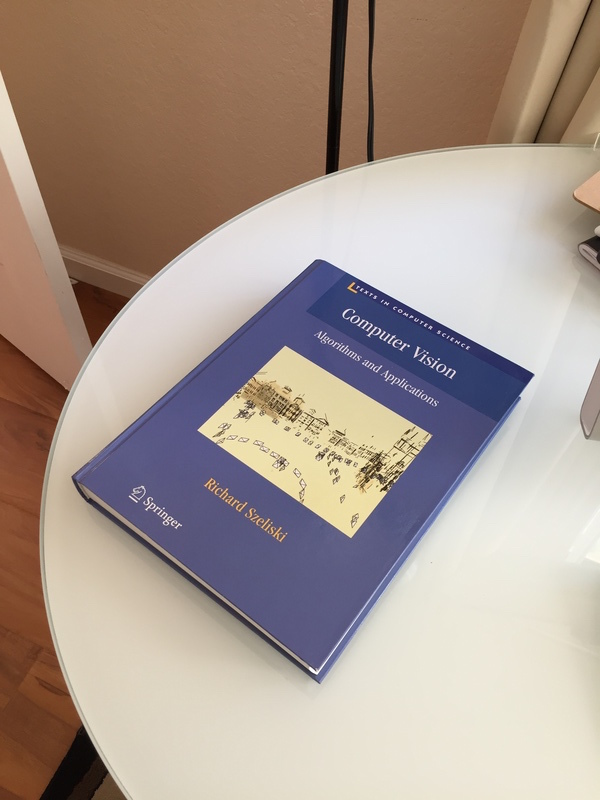

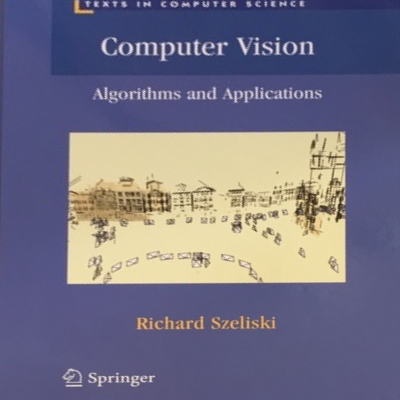

In [27]:
I = cv2.imread('/content/drive/My Drive/Day4 Material/book1.jpg')
cv2_imshow(I)

height, width = 400, 400
dst_pts = np.array([[0, 0], [width-1, 0], [width-1,height-1], [0,height-1]])
src_pts = np.load('/content/drive/My Drive/Day4 Material/Points.npy')

H, status = cv2.findHomography(src_pts, dst_pts) 
im_dst = cv2.warpPerspective(I, H, (width, height))

cv2_imshow(im_dst)

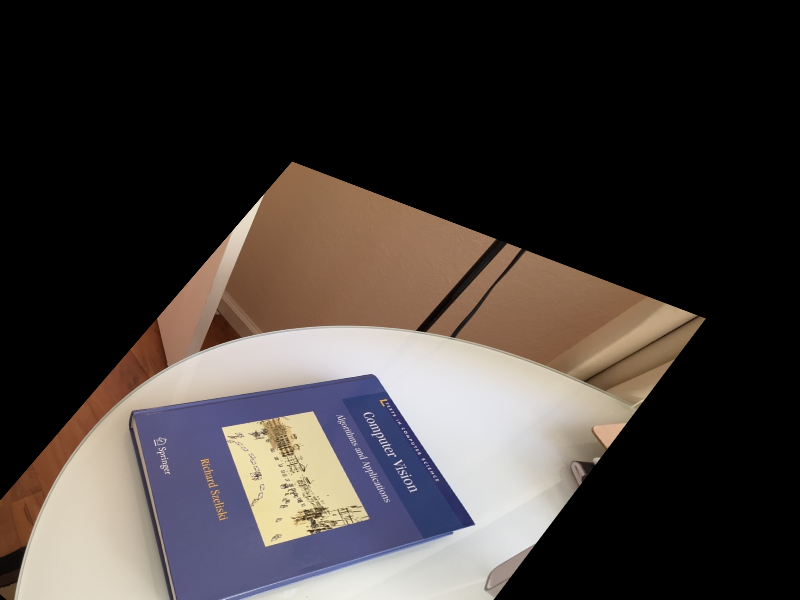

In [36]:
I1 = cv2.imread('/content/drive/My Drive/Day4 Material/book1.jpg')
I2 = cv2.imread('/content/drive/My Drive/Day4 Material/book2.jpg')

pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)

pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)

H, s= cv2.findHomography(pts_src, pts_dst)
im= cv2.warpPerspective(I1, H, (I2.shape[0], I2.shape[1]))
# cv2_imshow(np.hstack([I1, I2, im]))
cv2_imshow(im)

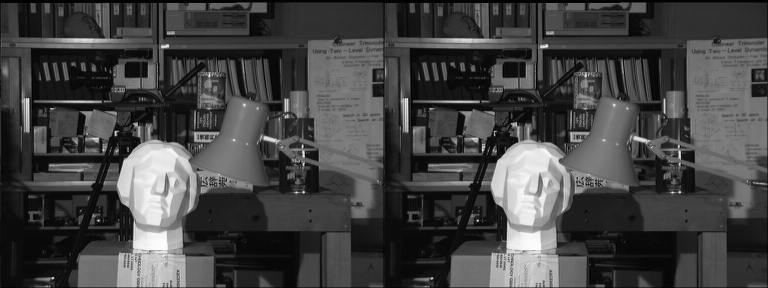

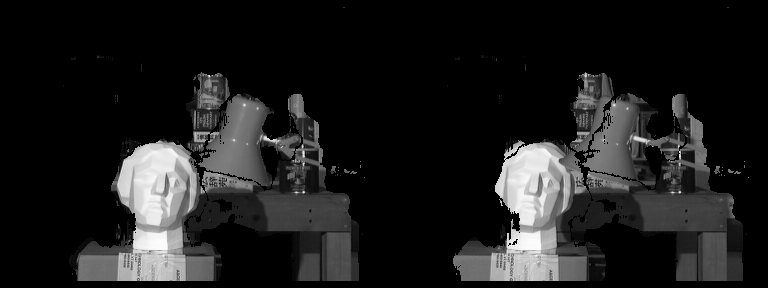

In [45]:
I1 = cv2.imread('/content/drive/My Drive/Day4 Material/tsukuba_l.png', 0)
I2 = cv2.imread('/content/drive/My Drive/Day4 Material/tsukuba_r.png', 0)


cv2_imshow(np.hstack([I1, I2]))

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL, imgR)


limg = np.where(disparity < 100, 0, I1)
rimg = np.where(disparity < 100, 0, I2)

cv2_imshow(np.hstack([limg, rimg]))
